# ICPC Quantum challenge problem three.

The problem three was a series of circuits with the main concern of a applying a phase to the circuit if a condition was met. For example, if the multiplication of 3 qubits was one then you have to apply a phase of beta degrees to the circuit.

## Problem: Reflection unitaries

In the previous two problems, the output of a classical Boolean function is computed into an additional qubit. However, quantum computers can also compute Boolean functions into the phase of a quantum state, which we explore in this problem.

Suppose $f:\{0,1\}^n\rightarrow\{0,1\}$ is a Boolean function. For $\beta \in R$, define an $\textit{n}$-qubit unitary

$$
\large
\begin{equation*}
    U_f(\beta) = \sum_{x\in\{0,1\}^n} e^{i\beta f(x)}|x\rangle \langle x|
\tag{1}
\end{equation*}
$$
When $U_f$ is applied to computational basis state $|x\rangle$ it adds a phase $e^{i\beta}$ if $f(x) = 1$ and does  nothing otherwise.<br>
Your goal in this problem is to implement $U_f$ for a variety of functions with $\textit{n}$= 3
<h3>
\begin{align}
f_0(x_1x_2x_3)&=0,\quad f_1(x_1x_2x_3)=x_1x_2x_3,\quad f_2(x_1x_2x_3)=x_1x_2x_3+(1-x_1)(1-x_2)(1-x_3),\\\nonumber
f_3(x_1x_2x_3)&=x_1+x_2+x_3+x_1x_2x_3,\quad f_4(x_1x_2x_3)=x_1+x_2+x_3.
\tag{2}
\end{align}
</h3>
Here, $f_m$ has m solutions to f(x) = 1. For instance,$f_2$ evaluates to 1 on the inputs x = 000 and x = 111.You may use $A \geq 0$ ancilla qubits in your implementation initialized in $∣0^A\rangle$ as long as they are returned to $∣0^A\rangle$ by the end of the computation. 

The "reflection unitaries" $U_f(\beta)$ are useful in some quantum algorithms. In particular, the famous Grover search algorithm uses these reflections to outperform classical search algorithms for unstructured lists.

###    $f_m$ for m = 0

## SOLUTION
This one was the easiest of all the excercises. You had to leave the circuit as before the application of the beta phase. So we only need to apply the phase and then apply it's inverse to get the original circuit. Easy.

In [2]:

# Importing the qiskit module
from qiskit import *
from qiskit.circuit import Parameter
params = [Parameter('beta')]

q0 =    3 # number of required qubits
a0 =    0 # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_0(q,a):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a)  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    params = [Parameter('beta')]
    Circ.p(params[0], 0)
    Circ.p(-params[0], 0)

    
    ########################################
    
    # Uncomment to draw quantum circuit
   # display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_0 = Circuit_0(q0,a0)

### $f_m$ for m = 1

## SOLUTION
One thing to keep in mind is that we are only going to apply the phase if the qubits are all in the state $|1>$. We can check this condition by calculating a toffoli gate over the three input qubits to control an ancilla qubit and then applying the phase over the ancilla qubit. Then if all of input qubits were one we can apply the phase just as we wanted. If not, we don't apply the phase because applying a phase over the state $|0>$ has no effect. Remember that a qubit is initialized by default in the $|0>$ state.

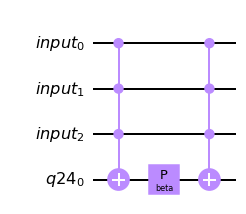

In [10]:
# Importing the qiskit module
from qiskit import *
from qiskit.circuit.library import CU1Gate
from qiskit.circuit.library.standard_gates import XGate
crz = CU1Gate(Parameter('beta'))
c3x_gate = XGate().control(3)
q1 =    3 # number of required qubits
a1 =    1 # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_1(q,a):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a)  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    Circ.append(c3x_gate,[Q[0],Q[1],Q[2],A[0]])
    Circ.p(params[0], A[0])
    Circ.append(c3x_gate,[Q[0],Q[1],Q[2],A[0]])

    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_1 = Circuit_1(q1,a1)

###   $f_m$ for m = 2

## SOLUTION
Please note the following: we can apply the phase only if the three input qubits were either in the state $|1>$ or $|0>$. And we already know how to apply the phase if the three qubits are one. And to check if the three qubits are in the state $|0>$ before applying the phase is pretty easy. We only need to apply an X gate to the input qubits and then we can apply the phase in the same way as the previous exercise. Now it only remains the question as: How can we calculate the sum?. The answer is simple, we don't. If we apply the circuit for the multiplication ($x_1x_2x_3$) and then the circuit for the other part ($x_1x_2x_3+(1-x_1)(1-x_2)(1-x_3)$) they are going to cancell one another if the two of them were one. Which results in a phase which is not applied. The other parts of the circui that you are going to see are just some gates to return the qubits to their original state (because it was a requirement of the problem).

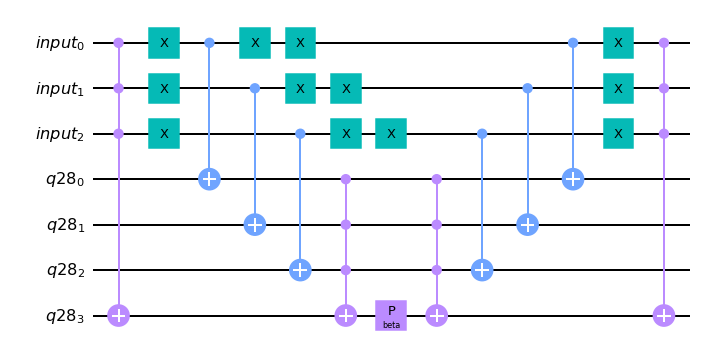

In [11]:
# Importing the qiskit module
from qiskit import *


q2 =    3 # number of required qubits
a2 =  4  # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_2(q,a):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a)  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q) 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    
    ##### Create you circuit below #########
    Circ.append(c3x_gate,[Q[0],Q[1],Q[2],A[3]])
    Circ.x(0)
    Circ.cx(0,A[0])
    Circ.x(0)
    Circ.x(1)
    Circ.cx(1,A[1])
    Circ.x(1)
    Circ.x(2)
    Circ.cx(2,A[2])
    Circ.x(2)
    Circ.append(c3x_gate,[A[0],A[1],A[2],A[3]])
    Circ.p(params[0], A[3])
    Circ.append(c3x_gate,[A[0],A[1],A[2],A[3]])
    Circ.x(2)
    Circ.cx(2,A[2])
    Circ.x(2)
    Circ.x(1)
    Circ.cx(1,A[1])
    Circ.x(1)
    Circ.x(0)
    Circ.cx(0,A[0])
    Circ.x(0)
    Circ.append(c3x_gate,[Q[0],Q[1],Q[2],A[3]])

    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_2 = Circuit_2(q2,a2)

###  $f_m$ for m = 3

## SOLUTION
It may have seen that the excercises were becoming more and more difficult but it was the oposite we had everything we needed to calculate the excercises. First of all if the three of the input qubits were in the state $|1>$ then we already know how to solve this problem. If $x_1$ was in the $|1>$ state then we only need to apply a single cx over an ancilla qubit to apply the phase. The same thing happens with $x_2$ and $x_3$. And for the addition we saw in the previous excercise that we can almost ignore it. So the solution was to plug in these things inside the circuit. And of course we needed to apply the same gates in reverse order to leave everything in the original state.

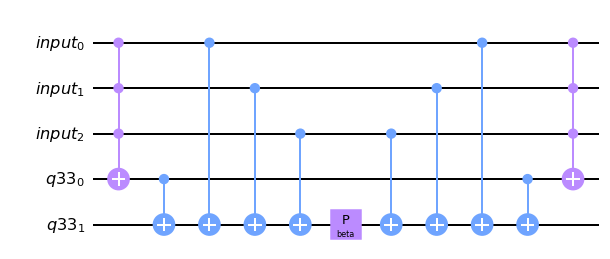

In [12]:
# Importing the qiskit module
from qiskit import *


q3 =   3  # number of required qubits
a3 =   2 # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_3(q,a):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a)  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q) 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    
    ##### Create you circuit below #########
    Circ.append(c3x_gate,[0,1,2,A[0]])
    Circ.cx(A[0],A[1])
    Circ.cx(0,A[1])
    Circ.cx(1,A[1])
    Circ.cx(2,A[1])
    Circ.p(params[0], A[1])
    Circ.cx(2,A[1])
    Circ.cx(1,A[1])
    Circ.cx(0,A[1])
    Circ.cx(A[0],A[1])
    Circ.append(c3x_gate,[0,1,2,A[0]])

    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_3 = Circuit_3(q3,a3)

###  $f_m$ for m = 4

## SOLUTION
And we finally arrived to the last excercise of the challenge. It was simple because all we had to do was to calculate a cx for each input qubit. The reason was the same as the previous excercise were we applied a cx for each input qubit.

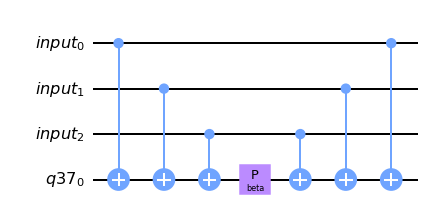

In [13]:
# Importing the qiskit module
from qiskit import *


q4 =   3  # number of required qubits
a4 =  1  # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_4(q,a):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a)  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q) 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    
    ##### Create you circuit below #########
    Circ.cx(0,A[0])
    Circ.cx(1,A[0])
    Circ.cx(2,A[0])
    Circ.p(params[0], A[0])
    Circ.cx(2,A[0])
    Circ.cx(1,A[0])
    Circ.cx(0,A[0])
    
    

    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_4 = Circuit_4(q4,a4)

### Grader

In [14]:
all_circuits = [qc_0, qc_1, qc_2, qc_3, qc_4]
from qc_grader import grade_ex3
import time
start_time = time.time()
grade_ex3(all_circuits)
print("--- %s seconds ---" % (time.time() - start_time))

Checking for circuit 0 ...
Checking for circuit 1 ...
Checking for circuit 2 ...
Checking for circuit 3 ...
Checking for circuit 4 ...
Grading your answer for ex3. Please wait...

Congratulations 🎉! Your answer is correct.
Your cost is 2632.
Feel free to submit your answer.

--- 6.97359299659729 seconds ---


## Circuit verification and Cost Metric

$\textbf{Costing metric:}$ For the $m^{th}$ circuit, let $G_m$ be the number of 2-qubit gates, $D_m$ the depth,  and $A_m$ the number of ancillas. Your solution quality will be judged on the following cost metric: 
$$\text{Cost} = \sum_{m=0}^4 10G_m + D_m(n+A_m)$$ .
The reasoning behind this metric relates to the error rates in quantum circuits. Notice that $D_m(n+A_m)$ is roughly the spacetime volume of the circuit (the collective number of timesteps qubits participating in thecircuit must be kept alive). Also, two-qubit gates are roughly (optimistically) 10 times as likely to fail as idling qubits. Thus, $Cost_n$ is roughly proportional to error rate of all of your circuits combined.

## References:

The ICPC Quantum challenge is only accessible through this [github repo](https://github.com/qiskit-community/ICPC-Quantum-Challenge-2021).